In [1]:
import tensorflow as tf
import numpy as np
import config
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import MachineLearning

In [136]:
data_dir = '/Users/siyangjing/Documents/GitHub/Data-Assimilation/FA18/Modularized/DiffInitData2/'
model_dir = '/Users/siyangjing/Documents/GitHub/Data-Assimilation/FA18/Modularized/DiffInitModel'
CFP = config.CFP

In [3]:
sys.argv[1] = 'evaluation'
data_dir = '/Users/siyangjing/Documents/GitHub/Data-Assimilation/FA18/Modularized/DiffInitData2/'
model_dir = '/Users/siyangjing/Documents/GitHub/Data-Assimilation/FA18/Modularized/DiffInitModel'
CFP = config.CFP

In [23]:
config.ReadConfigFile()
import tensorflow as tf
tf.reset_default_graph()
from importlib import reload
try:
    reload(MachineLearning)
except NameError:
    import MachineLearning
try:
    reload(MLOnline)
except NameError:
    import MLOnline

In [24]:
ml = MLOnline.ML()

ML class restores model from:/Users/siyangjing/Documents/GitHub/Data-Assimilation/FA18/Modularized/DiffInitModel/checkpoint_20000
INFO:tensorflow:Restoring parameters from /Users/siyangjing/Documents/GitHub/Data-Assimilation/FA18/Modularized/DiffInitModel/checkpoint_20000


In [25]:
dataGen = MachineLearning.DataGenerator()

In [26]:
X = dataGen._X
Y = dataGen._Y

In [9]:
X = MachineLearning._X
Y = MachineLearning._Y

In [27]:
Ypred = ml.evaluate(None,X)

In [28]:
((Ypred - Y) ** 2).mean()

26.019687292857927

In [19]:
config.ReadConfigFile()
import tensorflow as tf
tf.reset_default_graph()
from importlib import reload
try:
    reload(MachineLearning)
except NameError:
    import MachineLearning
pred_eval,loss_eval = MachineLearning.test()
loss_eval

saver restore from:/Users/siyangjing/Documents/GitHub/Data-Assimilation/FA18/Modularized/DiffInitModel/checkpoint_20000
INFO:tensorflow:Restoring parameters from /Users/siyangjing/Documents/GitHub/Data-Assimilation/FA18/Modularized/DiffInitModel/checkpoint_20000
Predict complete, cost [  0] seconds


26.019687292857927

In [20]:
config.ReadConfigFile()
import tensorflow as tf
tf.reset_default_graph()
try:
    from importlib import reload
    reload(MachineLearning)
except NameError:
    import MachineLearning
MachineLearning.main()

Machine Learning Training: global variable initialization...
[ Tue Dec  4 21:06:57 2018], epoch [  20], lr[0.10000000] ,loss[0.3259779513]
[ Tue Dec  4 21:06:57 2018], validation: iter [  20], loss[0.2835147977]
[ Tue Dec  4 21:06:58 2018], epoch [  40], lr[0.10000000] ,loss[0.2970823050]
[ Tue Dec  4 21:06:58 2018], validation: iter [  40], loss[0.2593260109]
[ Tue Dec  4 21:06:59 2018], epoch [  60], lr[0.10000000] ,loss[0.2897350192]
[ Tue Dec  4 21:06:59 2018], validation: iter [  60], loss[0.2529624701]
[ Tue Dec  4 21:07:00 2018], epoch [  80], lr[0.10000000] ,loss[0.2477287799]
[ Tue Dec  4 21:07:00 2018], validation: iter [  80], loss[0.2107638866]
[ Tue Dec  4 21:07:00 2018], epoch [ 100], lr[0.10000000] ,loss[0.2267061919]
[ Tue Dec  4 21:07:00 2018], validation: iter [ 100], loss[0.1870429367]
[ Tue Dec  4 21:07:01 2018], epoch [ 120], lr[0.10000000] ,loss[0.1726277918]
[ Tue Dec  4 21:07:01 2018], validation: iter [ 120], loss[0.1362935752]
[ Tue Dec  4 21:07:02 2018], epoc

[ Tue Dec  4 21:07:34 2018], epoch [1080], lr[0.10000000] ,loss[0.0758621171]
[ Tue Dec  4 21:07:34 2018], validation: iter [1080], loss[0.0327248648]
[ Tue Dec  4 21:07:35 2018], epoch [1100], lr[0.10000000] ,loss[0.0756169930]
[ Tue Dec  4 21:07:35 2018], validation: iter [1100], loss[0.0322089009]
[ Tue Dec  4 21:07:35 2018], epoch [1120], lr[0.10000000] ,loss[0.0776209235]
[ Tue Dec  4 21:07:35 2018], validation: iter [1120], loss[0.0344328806]
[ Tue Dec  4 21:07:36 2018], epoch [1140], lr[0.10000000] ,loss[0.0759279951]
[ Tue Dec  4 21:07:36 2018], validation: iter [1140], loss[0.0324369334]
[ Tue Dec  4 21:07:37 2018], epoch [1160], lr[0.10000000] ,loss[0.0756441504]
[ Tue Dec  4 21:07:37 2018], validation: iter [1160], loss[0.0321782716]
[ Tue Dec  4 21:07:38 2018], epoch [1180], lr[0.10000000] ,loss[0.0758556798]
[ Tue Dec  4 21:07:38 2018], validation: iter [1180], loss[0.0331811458]
[ Tue Dec  4 21:07:38 2018], epoch [1200], lr[0.10000000] ,loss[0.0764317736]
[ Tue Dec  4 21:

[ Tue Dec  4 21:08:10 2018], epoch [2140], lr[0.05000000] ,loss[0.0752031803]
[ Tue Dec  4 21:08:10 2018], validation: iter [2140], loss[0.0316767469]
[ Tue Dec  4 21:08:10 2018], epoch [2160], lr[0.05000000] ,loss[0.0751983225]
[ Tue Dec  4 21:08:10 2018], validation: iter [2160], loss[0.0316704251]
[ Tue Dec  4 21:08:11 2018], epoch [2180], lr[0.05000000] ,loss[0.0751933679]
[ Tue Dec  4 21:08:11 2018], validation: iter [2180], loss[0.0316641256]
[ Tue Dec  4 21:08:12 2018], epoch [2200], lr[0.05000000] ,loss[0.0751885623]
[ Tue Dec  4 21:08:12 2018], validation: iter [2200], loss[0.0316565409]
[ Tue Dec  4 21:08:12 2018], epoch [2220], lr[0.05000000] ,loss[0.0751825422]
[ Tue Dec  4 21:08:12 2018], validation: iter [2220], loss[0.0316493325]
[ Tue Dec  4 21:08:13 2018], epoch [2240], lr[0.05000000] ,loss[0.0751757994]
[ Tue Dec  4 21:08:13 2018], validation: iter [2240], loss[0.0316409618]
[ Tue Dec  4 21:08:13 2018], epoch [2260], lr[0.05000000] ,loss[0.0751714781]
[ Tue Dec  4 21:

[ Tue Dec  4 21:08:44 2018], epoch [3200], lr[0.05000000] ,loss[0.0750651285]
[ Tue Dec  4 21:08:44 2018], validation: iter [3200], loss[0.0314321220]
[ Tue Dec  4 21:08:45 2018], epoch [3220], lr[0.05000000] ,loss[0.0750646815]
[ Tue Dec  4 21:08:45 2018], validation: iter [3220], loss[0.0314309038]
[ Tue Dec  4 21:08:46 2018], epoch [3240], lr[0.05000000] ,loss[0.0756795332]
[ Tue Dec  4 21:08:46 2018], validation: iter [3240], loss[0.0325889960]
[ Tue Dec  4 21:08:46 2018], epoch [3260], lr[0.05000000] ,loss[0.0767543241]
[ Tue Dec  4 21:08:46 2018], validation: iter [3260], loss[0.0322622992]
[ Tue Dec  4 21:08:47 2018], epoch [3280], lr[0.05000000] ,loss[0.0752804279]
[ Tue Dec  4 21:08:47 2018], validation: iter [3280], loss[0.0315631777]
[ Tue Dec  4 21:08:48 2018], epoch [3300], lr[0.05000000] ,loss[0.0750895813]
[ Tue Dec  4 21:08:48 2018], validation: iter [3300], loss[0.0314611271]
[ Tue Dec  4 21:08:49 2018], epoch [3320], lr[0.05000000] ,loss[0.0750884265]
[ Tue Dec  4 21:

[ Tue Dec  4 21:09:19 2018], epoch [4260], lr[0.02500000] ,loss[0.0750272125]
[ Tue Dec  4 21:09:19 2018], validation: iter [4260], loss[0.0313287117]
[ Tue Dec  4 21:09:20 2018], epoch [4280], lr[0.02500000] ,loss[0.0750261769]
[ Tue Dec  4 21:09:20 2018], validation: iter [4280], loss[0.0313265473]
[ Tue Dec  4 21:09:20 2018], epoch [4300], lr[0.02500000] ,loss[0.0750246197]
[ Tue Dec  4 21:09:20 2018], validation: iter [4300], loss[0.0313240997]
[ Tue Dec  4 21:09:21 2018], epoch [4320], lr[0.02500000] ,loss[0.0750238895]
[ Tue Dec  4 21:09:21 2018], validation: iter [4320], loss[0.0313219838]
[ Tue Dec  4 21:09:21 2018], epoch [4340], lr[0.02500000] ,loss[0.0750223249]
[ Tue Dec  4 21:09:21 2018], validation: iter [4340], loss[0.0313195586]
[ Tue Dec  4 21:09:22 2018], epoch [4360], lr[0.02500000] ,loss[0.0750212818]
[ Tue Dec  4 21:09:22 2018], validation: iter [4360], loss[0.0313176438]
[ Tue Dec  4 21:09:22 2018], epoch [4380], lr[0.02500000] ,loss[0.0750199407]
[ Tue Dec  4 21:

[ Tue Dec  4 21:09:47 2018], epoch [5320], lr[0.02500000] ,loss[0.0750229433]
[ Tue Dec  4 21:09:47 2018], validation: iter [5320], loss[0.0313340276]
[ Tue Dec  4 21:09:48 2018], epoch [5340], lr[0.02500000] ,loss[0.0749694258]
[ Tue Dec  4 21:09:48 2018], validation: iter [5340], loss[0.0312236249]
[ Tue Dec  4 21:09:48 2018], epoch [5360], lr[0.02500000] ,loss[0.0749903321]
[ Tue Dec  4 21:09:48 2018], validation: iter [5360], loss[0.0312067624]
[ Tue Dec  4 21:09:49 2018], epoch [5380], lr[0.02500000] ,loss[0.0751535743]
[ Tue Dec  4 21:09:49 2018], validation: iter [5380], loss[0.0313487127]
[ Tue Dec  4 21:09:49 2018], epoch [5400], lr[0.02500000] ,loss[0.0752506703]
[ Tue Dec  4 21:09:49 2018], validation: iter [5400], loss[0.0315979607]
[ Tue Dec  4 21:09:50 2018], epoch [5420], lr[0.02500000] ,loss[0.0749894306]
[ Tue Dec  4 21:09:50 2018], validation: iter [5420], loss[0.0312789790]
[ Tue Dec  4 21:09:50 2018], epoch [5440], lr[0.02500000] ,loss[0.0750006214]
[ Tue Dec  4 21:

[ Tue Dec  4 21:10:22 2018], epoch [6380], lr[0.01250000] ,loss[0.0749410167]
[ Tue Dec  4 21:10:22 2018], validation: iter [6380], loss[0.0311240647]
[ Tue Dec  4 21:10:23 2018], epoch [6400], lr[0.01250000] ,loss[0.0749405175]
[ Tue Dec  4 21:10:23 2018], validation: iter [6400], loss[0.0311228912]
[ Tue Dec  4 21:10:23 2018], epoch [6420], lr[0.01250000] ,loss[0.0749398246]
[ Tue Dec  4 21:10:23 2018], validation: iter [6420], loss[0.0311215911]
[ Tue Dec  4 21:10:24 2018], epoch [6440], lr[0.01250000] ,loss[0.0749394000]
[ Tue Dec  4 21:10:24 2018], validation: iter [6440], loss[0.0311205052]
[ Tue Dec  4 21:10:25 2018], epoch [6460], lr[0.01250000] ,loss[0.0749390870]
[ Tue Dec  4 21:10:25 2018], validation: iter [6460], loss[0.0311191063]
[ Tue Dec  4 21:10:25 2018], epoch [6480], lr[0.01250000] ,loss[0.0749382526]
[ Tue Dec  4 21:10:25 2018], validation: iter [6480], loss[0.0311183110]
[ Tue Dec  4 21:10:26 2018], epoch [6500], lr[0.01250000] ,loss[0.0749380216]
[ Tue Dec  4 21:

[ Tue Dec  4 21:10:54 2018], epoch [7440], lr[0.01250000] ,loss[0.0749281794]
[ Tue Dec  4 21:10:54 2018], validation: iter [7440], loss[0.0310977343]
[ Tue Dec  4 21:10:54 2018], epoch [7460], lr[0.01250000] ,loss[0.0749400631]
[ Tue Dec  4 21:10:54 2018], validation: iter [7460], loss[0.0310442876]
[ Tue Dec  4 21:10:55 2018], epoch [7480], lr[0.01250000] ,loss[0.0750441551]
[ Tue Dec  4 21:10:55 2018], validation: iter [7480], loss[0.0310826898]
[ Tue Dec  4 21:10:55 2018], epoch [7500], lr[0.01250000] ,loss[0.0749148950]
[ Tue Dec  4 21:10:55 2018], validation: iter [7500], loss[0.0310424250]
Model saved in file: ['/Users/siyangjing/Documents/GitHub/Data-Assimilation/FA18/Modularized/DiffInitNormModel/checkpoint_7500']
[ Tue Dec  4 21:10:56 2018], epoch [7520], lr[0.01250000] ,loss[0.0749181956]
[ Tue Dec  4 21:10:56 2018], validation: iter [7520], loss[0.0310331061]
[ Tue Dec  4 21:10:56 2018], epoch [7540], lr[0.01250000] ,loss[0.0750779137]
[ Tue Dec  4 21:10:56 2018], validatio

[ Tue Dec  4 21:11:20 2018], epoch [8500], lr[0.00625000] ,loss[0.0748894438]
[ Tue Dec  4 21:11:20 2018], validation: iter [8500], loss[0.0310004298]
Model saved in file: ['/Users/siyangjing/Documents/GitHub/Data-Assimilation/FA18/Modularized/DiffInitNormModel/checkpoint_8500']
[ Tue Dec  4 21:11:21 2018], epoch [8520], lr[0.00625000] ,loss[0.0748891905]
[ Tue Dec  4 21:11:21 2018], validation: iter [8520], loss[0.0310001709]
[ Tue Dec  4 21:11:21 2018], epoch [8540], lr[0.00625000] ,loss[0.0748889223]
[ Tue Dec  4 21:11:21 2018], validation: iter [8540], loss[0.0309998151]
[ Tue Dec  4 21:11:22 2018], epoch [8560], lr[0.00625000] ,loss[0.0748886988]
[ Tue Dec  4 21:11:22 2018], validation: iter [8560], loss[0.0309996232]
[ Tue Dec  4 21:11:22 2018], epoch [8580], lr[0.00625000] ,loss[0.0748883486]
[ Tue Dec  4 21:11:22 2018], validation: iter [8580], loss[0.0309987031]
[ Tue Dec  4 21:11:23 2018], epoch [8600], lr[0.00625000] ,loss[0.0748881102]
[ Tue Dec  4 21:11:23 2018], validatio

[ Tue Dec  4 21:11:46 2018], epoch [9540], lr[0.00625000] ,loss[0.0748742893]
[ Tue Dec  4 21:11:46 2018], validation: iter [9540], loss[0.0309749711]
[ Tue Dec  4 21:11:47 2018], epoch [9560], lr[0.00625000] ,loss[0.0748731419]
[ Tue Dec  4 21:11:47 2018], validation: iter [9560], loss[0.0309743844]
[ Tue Dec  4 21:11:47 2018], epoch [9580], lr[0.00625000] ,loss[0.0748731792]
[ Tue Dec  4 21:11:47 2018], validation: iter [9580], loss[0.0309715718]
[ Tue Dec  4 21:11:48 2018], epoch [9600], lr[0.00625000] ,loss[0.0749974325]
[ Tue Dec  4 21:11:48 2018], validation: iter [9600], loss[0.0310410745]
[ Tue Dec  4 21:11:49 2018], epoch [9620], lr[0.00625000] ,loss[0.0749037564]
[ Tue Dec  4 21:11:49 2018], validation: iter [9620], loss[0.0309751797]
[ Tue Dec  4 21:11:49 2018], epoch [9640], lr[0.00625000] ,loss[0.0748765618]
[ Tue Dec  4 21:11:49 2018], validation: iter [9640], loss[0.0309687052]
[ Tue Dec  4 21:11:50 2018], epoch [9660], lr[0.00625000] ,loss[0.0748730376]
[ Tue Dec  4 21:

[ Tue Dec  4 21:12:14 2018], epoch [10600], lr[0.00312500] ,loss[0.0748576745]
[ Tue Dec  4 21:12:14 2018], validation: iter [10600], loss[0.0309610665]
[ Tue Dec  4 21:12:14 2018], epoch [10620], lr[0.00312500] ,loss[0.0748574734]
[ Tue Dec  4 21:12:14 2018], validation: iter [10620], loss[0.0309612062]
[ Tue Dec  4 21:12:15 2018], epoch [10640], lr[0.00312500] ,loss[0.0748571232]
[ Tue Dec  4 21:12:15 2018], validation: iter [10640], loss[0.0309612881]
[ Tue Dec  4 21:12:15 2018], epoch [10660], lr[0.00312500] ,loss[0.0748567507]
[ Tue Dec  4 21:12:15 2018], validation: iter [10660], loss[0.0309611429]
[ Tue Dec  4 21:12:16 2018], epoch [10680], lr[0.00312500] ,loss[0.0748564303]
[ Tue Dec  4 21:12:16 2018], validation: iter [10680], loss[0.0309610646]
[ Tue Dec  4 21:12:16 2018], epoch [10700], lr[0.00312500] ,loss[0.0748563185]
[ Tue Dec  4 21:12:16 2018], validation: iter [10700], loss[0.0309611037]
[ Tue Dec  4 21:12:17 2018], epoch [10720], lr[0.00312500] ,loss[0.0748556927]
[ T

[ Tue Dec  4 21:12:40 2018], epoch [11640], lr[0.00312500] ,loss[0.0748400539]
[ Tue Dec  4 21:12:40 2018], validation: iter [11640], loss[0.0309862029]
[ Tue Dec  4 21:12:40 2018], epoch [11660], lr[0.00312500] ,loss[0.0748477876]
[ Tue Dec  4 21:12:40 2018], validation: iter [11660], loss[0.0309576858]
[ Tue Dec  4 21:12:41 2018], epoch [11680], lr[0.00312500] ,loss[0.0748399273]
[ Tue Dec  4 21:12:41 2018], validation: iter [11680], loss[0.0309616756]
[ Tue Dec  4 21:12:41 2018], epoch [11700], lr[0.00312500] ,loss[0.0748406127]
[ Tue Dec  4 21:12:41 2018], validation: iter [11700], loss[0.0309600048]
[ Tue Dec  4 21:12:42 2018], epoch [11720], lr[0.00312500] ,loss[0.0748525262]
[ Tue Dec  4 21:12:42 2018], validation: iter [11720], loss[0.0309583247]
[ Tue Dec  4 21:12:42 2018], epoch [11740], lr[0.00312500] ,loss[0.0748352781]
[ Tue Dec  4 21:12:42 2018], validation: iter [11740], loss[0.0309737604]
[ Tue Dec  4 21:12:43 2018], epoch [11760], lr[0.00312500] ,loss[0.0748386085]
[ T

[ Tue Dec  4 21:13:06 2018], epoch [12680], lr[0.00156250] ,loss[0.0748261660]
[ Tue Dec  4 21:13:06 2018], validation: iter [12680], loss[0.0309609156]
[ Tue Dec  4 21:13:06 2018], epoch [12700], lr[0.00156250] ,loss[0.0748259202]
[ Tue Dec  4 21:13:06 2018], validation: iter [12700], loss[0.0309609864]
[ Tue Dec  4 21:13:07 2018], epoch [12720], lr[0.00156250] ,loss[0.0748257041]
[ Tue Dec  4 21:13:07 2018], validation: iter [12720], loss[0.0309608951]
[ Tue Dec  4 21:13:07 2018], epoch [12740], lr[0.00156250] ,loss[0.0748253390]
[ Tue Dec  4 21:13:07 2018], validation: iter [12740], loss[0.0309610050]
[ Tue Dec  4 21:13:08 2018], epoch [12760], lr[0.00156250] ,loss[0.0748252794]
[ Tue Dec  4 21:13:08 2018], validation: iter [12760], loss[0.0309610330]
[ Tue Dec  4 21:13:08 2018], epoch [12780], lr[0.00156250] ,loss[0.0748249143]
[ Tue Dec  4 21:13:08 2018], validation: iter [12780], loss[0.0309610106]
[ Tue Dec  4 21:13:09 2018], epoch [12800], lr[0.00156250] ,loss[0.0748246610]
[ T

[ Tue Dec  4 21:13:32 2018], epoch [13720], lr[0.00156250] ,loss[0.0748089477]
[ Tue Dec  4 21:13:32 2018], validation: iter [13720], loss[0.0309621394]
[ Tue Dec  4 21:13:32 2018], epoch [13740], lr[0.00156250] ,loss[0.0748098344]
[ Tue Dec  4 21:13:32 2018], validation: iter [13740], loss[0.0309606157]
[ Tue Dec  4 21:13:33 2018], epoch [13760], lr[0.00156250] ,loss[0.0748124197]
[ Tue Dec  4 21:13:33 2018], validation: iter [13760], loss[0.0309661273]
[ Tue Dec  4 21:13:33 2018], epoch [13780], lr[0.00156250] ,loss[0.0748077929]
[ Tue Dec  4 21:13:33 2018], validation: iter [13780], loss[0.0309596919]
[ Tue Dec  4 21:13:34 2018], epoch [13800], lr[0.00156250] ,loss[0.0748047233]
[ Tue Dec  4 21:13:34 2018], validation: iter [13800], loss[0.0309775677]
[ Tue Dec  4 21:13:34 2018], epoch [13820], lr[0.00156250] ,loss[0.0748059377]
[ Tue Dec  4 21:13:34 2018], validation: iter [13820], loss[0.0309657473]
[ Tue Dec  4 21:13:35 2018], epoch [13840], lr[0.00156250] ,loss[0.0748071522]
[ T

[ Tue Dec  4 21:13:59 2018], epoch [14760], lr[0.00078125] ,loss[0.0747974515]
[ Tue Dec  4 21:13:59 2018], validation: iter [14760], loss[0.0309607275]
[ Tue Dec  4 21:13:59 2018], epoch [14780], lr[0.00078125] ,loss[0.0747971535]
[ Tue Dec  4 21:13:59 2018], validation: iter [14780], loss[0.0309603736]
[ Tue Dec  4 21:14:00 2018], epoch [14800], lr[0.00078125] ,loss[0.0747972056]
[ Tue Dec  4 21:14:00 2018], validation: iter [14800], loss[0.0309605710]
[ Tue Dec  4 21:14:00 2018], epoch [14820], lr[0.00078125] ,loss[0.0747973546]
[ Tue Dec  4 21:14:00 2018], validation: iter [14820], loss[0.0309603643]
[ Tue Dec  4 21:14:01 2018], epoch [14840], lr[0.00078125] ,loss[0.0747968256]
[ Tue Dec  4 21:14:01 2018], validation: iter [14840], loss[0.0309605319]
[ Tue Dec  4 21:14:01 2018], epoch [14860], lr[0.00078125] ,loss[0.0747964606]
[ Tue Dec  4 21:14:01 2018], validation: iter [14860], loss[0.0309604742]
[ Tue Dec  4 21:14:02 2018], epoch [14880], lr[0.00078125] ,loss[0.0747957230]
[ T

[ Tue Dec  4 21:14:26 2018], epoch [15800], lr[0.00078125] ,loss[0.0747763216]
[ Tue Dec  4 21:14:26 2018], validation: iter [15800], loss[0.0309538767]
[ Tue Dec  4 21:14:26 2018], epoch [15820], lr[0.00078125] ,loss[0.0747744888]
[ Tue Dec  4 21:14:26 2018], validation: iter [15820], loss[0.0309515912]
[ Tue Dec  4 21:14:27 2018], epoch [15840], lr[0.00078125] ,loss[0.0747725517]
[ Tue Dec  4 21:14:27 2018], validation: iter [15840], loss[0.0309491511]
[ Tue Dec  4 21:14:27 2018], epoch [15860], lr[0.00078125] ,loss[0.0747685730]
[ Tue Dec  4 21:14:27 2018], validation: iter [15860], loss[0.0309443660]
[ Tue Dec  4 21:14:28 2018], epoch [15880], lr[0.00078125] ,loss[0.0747673810]
[ Tue Dec  4 21:14:28 2018], validation: iter [15880], loss[0.0309433602]
[ Tue Dec  4 21:14:29 2018], epoch [15900], lr[0.00078125] ,loss[0.0747641027]
[ Tue Dec  4 21:14:29 2018], validation: iter [15900], loss[0.0309401359]
[ Tue Dec  4 21:14:29 2018], epoch [15920], lr[0.00078125] ,loss[0.0747632608]
[ T

[ Tue Dec  4 21:14:55 2018], epoch [16840], lr[0.00039063] ,loss[0.0747571886]
[ Tue Dec  4 21:14:55 2018], validation: iter [16840], loss[0.0309379008]
[ Tue Dec  4 21:14:55 2018], epoch [16860], lr[0.00039063] ,loss[0.0747572407]
[ Tue Dec  4 21:14:55 2018], validation: iter [16860], loss[0.0309380181]
[ Tue Dec  4 21:14:56 2018], epoch [16880], lr[0.00039063] ,loss[0.0747575685]
[ Tue Dec  4 21:14:56 2018], validation: iter [16880], loss[0.0309382007]
[ Tue Dec  4 21:14:56 2018], epoch [16900], lr[0.00039063] ,loss[0.0747569427]
[ Tue Dec  4 21:14:56 2018], validation: iter [16900], loss[0.0309381746]
[ Tue Dec  4 21:14:57 2018], epoch [16920], lr[0.00039063] ,loss[0.0747568086]
[ Tue Dec  4 21:14:57 2018], validation: iter [16920], loss[0.0309380647]
[ Tue Dec  4 21:14:57 2018], epoch [16940], lr[0.00039063] ,loss[0.0747566149]
[ Tue Dec  4 21:14:57 2018], validation: iter [16940], loss[0.0309378952]
[ Tue Dec  4 21:14:57 2018], epoch [16960], lr[0.00039063] ,loss[0.0747567117]
[ T

[ Tue Dec  4 21:15:22 2018], epoch [17880], lr[0.00039063] ,loss[0.0747519732]
[ Tue Dec  4 21:15:22 2018], validation: iter [17880], loss[0.0309371427]
[ Tue Dec  4 21:15:22 2018], epoch [17900], lr[0.00039063] ,loss[0.0747491121]
[ Tue Dec  4 21:15:22 2018], validation: iter [17900], loss[0.0309395120]
[ Tue Dec  4 21:15:23 2018], epoch [17920], lr[0.00039063] ,loss[0.0747503713]
[ Tue Dec  4 21:15:23 2018], validation: iter [17920], loss[0.0309385527]
[ Tue Dec  4 21:15:23 2018], epoch [17940], lr[0.00039063] ,loss[0.0747491568]
[ Tue Dec  4 21:15:23 2018], validation: iter [17940], loss[0.0309379101]
[ Tue Dec  4 21:15:24 2018], epoch [17960], lr[0.00039063] ,loss[0.0747501180]
[ Tue Dec  4 21:15:24 2018], validation: iter [17960], loss[0.0309377145]
[ Tue Dec  4 21:15:24 2018], epoch [17980], lr[0.00039063] ,loss[0.0747492760]
[ Tue Dec  4 21:15:24 2018], validation: iter [17980], loss[0.0309378449]
[ Tue Dec  4 21:15:25 2018], epoch [18000], lr[0.00039063] ,loss[0.0747498125]
[ T

[ Tue Dec  4 21:15:50 2018], epoch [18920], lr[0.00019531] ,loss[0.0747442991]
[ Tue Dec  4 21:15:50 2018], validation: iter [18920], loss[0.0309378393]
[ Tue Dec  4 21:15:50 2018], epoch [18940], lr[0.00019531] ,loss[0.0747441947]
[ Tue Dec  4 21:15:50 2018], validation: iter [18940], loss[0.0309378784]
[ Tue Dec  4 21:15:51 2018], epoch [18960], lr[0.00019531] ,loss[0.0747440606]
[ Tue Dec  4 21:15:51 2018], validation: iter [18960], loss[0.0309378654]
[ Tue Dec  4 21:15:51 2018], epoch [18980], lr[0.00019531] ,loss[0.0747439489]
[ Tue Dec  4 21:15:51 2018], validation: iter [18980], loss[0.0309378523]
[ Tue Dec  4 21:15:52 2018], epoch [19000], lr[0.00019531] ,loss[0.0747442394]
[ Tue Dec  4 21:15:52 2018], validation: iter [19000], loss[0.0309380759]
Model saved in file: ['/Users/siyangjing/Documents/GitHub/Data-Assimilation/FA18/Modularized/DiffInitNormModel/checkpoint_19000']
[ Tue Dec  4 21:15:52 2018], epoch [19020], lr[0.00019531] ,loss[0.0747441053]
[ Tue Dec  4 21:15:52 2018

[ Tue Dec  4 21:16:17 2018], epoch [19960], lr[0.00019531] ,loss[0.0747364461]
[ Tue Dec  4 21:16:17 2018], validation: iter [19960], loss[0.0309386514]
[ Tue Dec  4 21:16:17 2018], epoch [19980], lr[0.00019531] ,loss[0.0747377500]
[ Tue Dec  4 21:16:17 2018], validation: iter [19980], loss[0.0309371781]
[ Tue Dec  4 21:16:18 2018], epoch [20000], lr[0.00019531] ,loss[0.0747375414]
[ Tue Dec  4 21:16:18 2018], validation: iter [20000], loss[0.0309375431]
Model saved in file: ['/Users/siyangjing/Documents/GitHub/Data-Assimilation/FA18/Modularized/DiffInitNormModel/checkpoint_20000']
Model saved in file: ['/Users/siyangjing/Documents/GitHub/Data-Assimilation/FA18/Modularized/DiffInitNormModel/checkpoint_20000']
Finished training!


In [5]:
config.ReadConfigFile()
sys.argv[1] = 'evaluation'
# config.ResetValue('MachineLearning','normalization','False')
# config.ResetValue('MLEvaluation','observation_source',data_dir)
# config.ResetValue('MLEvaluation','data_source',data_dir)
# config.ResetValue('MachineLearning','save_dir',model_dir)
import tensorflow as tf
tf.reset_default_graph()
from importlib import reload
reload(MachineLearning)
pred,loss = MachineLearning.test()

saver restore from:/Users/siyangjing/Documents/GitHub/Data-Assimilation/FA18/Modularized/DiffInitModel/checkpoint_20000
INFO:tensorflow:Restoring parameters from /Users/siyangjing/Documents/GitHub/Data-Assimilation/FA18/Modularized/DiffInitModel/checkpoint_20000
Predict complete, cost [  0] seconds


In [7]:
loss

26.019687292857927

In [8]:
pred

array([[5.3869743e+01, 3.5332367e-02, 5.0378479e+01, 1.6044672e+02,
        3.8933717e-02],
       [5.2307961e+01, 3.5442010e-02, 4.8833618e+01, 1.6179877e+02,
        3.9005246e-02],
       [5.2112419e+01, 3.5455748e-02, 4.8640198e+01, 1.6196805e+02,
        3.9014202e-02],
       ...,
       [8.2163124e+01, 3.3346012e-02, 7.8365059e+01, 1.3595314e+02,
        3.7637815e-02],
       [8.3316872e+01, 3.3265024e-02, 7.9506302e+01, 1.3495435e+02,
        3.7584972e-02],
       [8.5027809e+01, 3.3144906e-02, 8.1198692e+01, 1.3347318e+02,
        3.7506610e-02]], dtype=float32)

In [9]:
MachineLearning._Y

array([[5.14864059e+01, 1.45728070e-01, 4.27600881e+01, 1.91942253e+02,
        1.65801574e-01],
       [5.22582368e+01, 1.26984521e-01, 4.41256914e+01, 1.88195763e+02,
        1.43298762e-01],
       [5.34969108e+01, 1.12672733e-01, 4.58221772e+01, 1.84531258e+02,
        1.26497331e-01],
       ...,
       [8.39717611e+01, 4.17903422e-02, 7.91199144e+01, 1.41345259e+02,
        4.83785479e-02],
       [8.50500012e+01, 4.04617951e-02, 8.02876748e+01, 1.39905598e+02,
        4.68834857e-02],
       [8.66576970e+01, 3.86915264e-02, 8.20158413e+01, 1.37861226e+02,
        4.49036318e-02]])

In [10]:
X = MachineLearning._X
Y = MachineLearning._Y

In [11]:
diff = pred - Y

In [12]:
diff_seq = (diff ** 2).mean(axis=1)

In [13]:
rel_diff_seq = abs(diff/Y).mean(axis=1)

In [14]:
diff_norm = (diff ** 2).sum(axis = 1)
truth_norm = (Y ** 2).sum(axis = 1)

In [15]:
rel_error = diff_norm / truth_norm

In [26]:
sort_index = np.argsort(rel_error)
sort_index = np.flip(sort_index)

In [33]:
sort_index.shape

(100000,)

In [41]:
rel_error[sort_index[:2300]]

array([9.11131944, 9.0516749 , 8.78704316, ..., 0.01045162, 0.01044946,
       0.01044723])

In [43]:
large_error_index = sort_index[:2300]

In [53]:
np.set_printoptions(threshold=np.nan)
index_sorted = np.sort(large_error_index)

In [55]:
np.sort(index_sorted % 1000)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   

(array([605., 479., 391., 288., 256., 117., 112.,  27.,  21.,   4.]),
 array([  0. ,  10.6,  21.2,  31.8,  42.4,  53. ,  63.6,  74.2,  84.8,
         95.4, 106. ]),
 <a list of 10 Patch objects>)

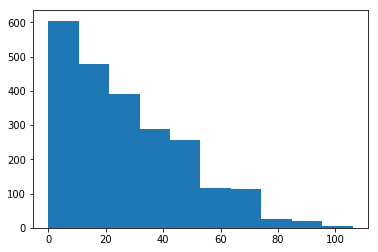

In [56]:
plt.hist(index_sorted % 1000)

In [57]:
index_sorted

array([    0,     1,     2,    24,    25,    26,    27,    45,    46,
        2004,  2005,  2006,  2007,  2008,  2009,  2022,  2023,  2024,
        2025,  2026,  2027,  2028,  5000,  5001,  5002,  5003,  5004,
        5005,  5006,  5007,  5008,  5009,  5010,  5011,  5012,  5013,
        5014,  5015,  5016,  5017,  5018,  5019,  5020,  5021,  5022,
        5023,  5024,  5025,  5026,  5027,  5028,  5029,  5030,  5031,
        5032,  5033,  5034,  5035,  5036,  5037,  5038,  5039,  5040,
        5041,  5042,  5043,  5044,  5045,  5046,  5047,  5048,  5049,
        5050,  5064,  5065,  5066,  8000,  8001,  8002,  8003,  8004,
        8005,  8006,  8007,  8008,  8009,  9000,  9001, 10000, 10001,
       10002, 11000, 11001, 11002, 11003, 11004, 11005, 11006, 11007,
       11008, 11009, 11010, 11011, 11012, 11013, 11014, 11015, 11016,
       11017, 11018, 11019, 11020, 11021, 11022, 11023, 11024, 11025,
       11026, 11027, 11028, 11029, 11030, 11031, 11032, 11033, 11034,
       11035, 11036,

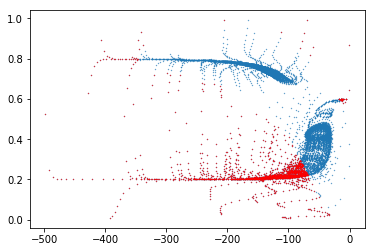

In [89]:
plt.scatter(X[:,0],X[:,1],s=0.1)
#plt.plot(X[large_error_index,0],X[large_error_index,1],'r.',markersize=0.5)
#plt.scatter(X[large_error_index,0],X[large_error_index,1],s=0.1,c='r')
th = 2000
plt.scatter(X[sort_index[:th],0],X[sort_index[:th],1],s=0.1,c='r')

In [2]:
data_dir = '/Users/siyangjing/Documents/GitHub/Data-Assimilation/FA18/Modularized/DiffInitData/'
model_dir = '/Users/siyangjing/Documents/GitHub/Data-Assimilation/FA18/Modularized/DiffInitNormModel/'
CFP = config.CFP
config.ReadConfigFile()

In [3]:
import tensorflow as tf
tf.reset_default_graph()
try:
    from importlib import reload
    reload(MachineLearning)
except NameError:
    import MachineLearning
sys.argv[1] = 'training'
MachineLearning.main()

Machine Learning Training: global variable initialization...
[ Tue Dec  4 20:42:00 2018], epoch [  20], lr[0.10000000] ,loss[0.3413880169]
[ Tue Dec  4 20:42:00 2018], validation: iter [  20], loss[0.3624087870]
[ Tue Dec  4 20:42:00 2018], epoch [  40], lr[0.10000000] ,loss[0.3104988635]
[ Tue Dec  4 20:42:00 2018], validation: iter [  40], loss[0.3296366334]
[ Tue Dec  4 20:42:01 2018], epoch [  60], lr[0.10000000] ,loss[0.2455753088]
[ Tue Dec  4 20:42:01 2018], validation: iter [  60], loss[0.2626973689]
[ Tue Dec  4 20:42:01 2018], epoch [  80], lr[0.10000000] ,loss[0.2410315573]
[ Tue Dec  4 20:42:01 2018], validation: iter [  80], loss[0.2589938641]
[ Tue Dec  4 20:42:02 2018], epoch [ 100], lr[0.10000000] ,loss[0.2392812520]
[ Tue Dec  4 20:42:02 2018], validation: iter [ 100], loss[0.2572931945]
[ Tue Dec  4 20:42:02 2018], epoch [ 120], lr[0.10000000] ,loss[0.2375936061]
[ Tue Dec  4 20:42:02 2018], validation: iter [ 120], loss[0.2555260360]
[ Tue Dec  4 20:42:03 2018], epoc

[ Tue Dec  4 20:42:30 2018], epoch [1080], lr[0.10000000] ,loss[0.2317035049]
[ Tue Dec  4 20:42:30 2018], validation: iter [1080], loss[0.2481981069]
[ Tue Dec  4 20:42:31 2018], epoch [1100], lr[0.10000000] ,loss[0.2324570864]
[ Tue Dec  4 20:42:31 2018], validation: iter [1100], loss[0.2492799610]
[ Tue Dec  4 20:42:32 2018], epoch [1120], lr[0.10000000] ,loss[0.2319381237]
[ Tue Dec  4 20:42:32 2018], validation: iter [1120], loss[0.2479735911]
[ Tue Dec  4 20:42:33 2018], epoch [1140], lr[0.10000000] ,loss[0.2321629524]
[ Tue Dec  4 20:42:33 2018], validation: iter [1140], loss[0.2482413352]
[ Tue Dec  4 20:42:33 2018], epoch [1160], lr[0.10000000] ,loss[0.2322482616]
[ Tue Dec  4 20:42:33 2018], validation: iter [1160], loss[0.2485295683]
[ Tue Dec  4 20:42:34 2018], epoch [1180], lr[0.10000000] ,loss[0.2317163497]
[ Tue Dec  4 20:42:34 2018], validation: iter [1180], loss[0.2484838665]
[ Tue Dec  4 20:42:34 2018], epoch [1200], lr[0.10000000] ,loss[0.2320197374]
[ Tue Dec  4 20:

[ Tue Dec  4 20:43:01 2018], epoch [2140], lr[0.05000000] ,loss[0.2307899892]
[ Tue Dec  4 20:43:01 2018], validation: iter [2140], loss[0.2470216602]
[ Tue Dec  4 20:43:02 2018], epoch [2160], lr[0.05000000] ,loss[0.2307938486]
[ Tue Dec  4 20:43:02 2018], validation: iter [2160], loss[0.2470064461]
[ Tue Dec  4 20:43:02 2018], epoch [2180], lr[0.05000000] ,loss[0.2307692468]
[ Tue Dec  4 20:43:02 2018], validation: iter [2180], loss[0.2470029294]
[ Tue Dec  4 20:43:03 2018], epoch [2200], lr[0.05000000] ,loss[0.2307568192]
[ Tue Dec  4 20:43:03 2018], validation: iter [2200], loss[0.2469751686]
[ Tue Dec  4 20:43:03 2018], epoch [2220], lr[0.05000000] ,loss[0.2307647467]
[ Tue Dec  4 20:43:03 2018], validation: iter [2220], loss[0.2469614893]
[ Tue Dec  4 20:43:04 2018], epoch [2240], lr[0.05000000] ,loss[0.2307508737]
[ Tue Dec  4 20:43:04 2018], validation: iter [2240], loss[0.2469799668]
[ Tue Dec  4 20:43:04 2018], epoch [2260], lr[0.05000000] ,loss[0.2307483405]
[ Tue Dec  4 20:

[ Tue Dec  4 20:43:34 2018], epoch [3200], lr[0.05000000] ,loss[0.2310281098]
[ Tue Dec  4 20:43:34 2018], validation: iter [3200], loss[0.2470323890]
[ Tue Dec  4 20:43:35 2018], epoch [3220], lr[0.05000000] ,loss[0.2305053473]
[ Tue Dec  4 20:43:35 2018], validation: iter [3220], loss[0.2465889454]
[ Tue Dec  4 20:43:35 2018], epoch [3240], lr[0.05000000] ,loss[0.2305561751]
[ Tue Dec  4 20:43:35 2018], validation: iter [3240], loss[0.2467885911]
[ Tue Dec  4 20:43:36 2018], epoch [3260], lr[0.05000000] ,loss[0.2308375388]
[ Tue Dec  4 20:43:36 2018], validation: iter [3260], loss[0.2470826507]
[ Tue Dec  4 20:43:37 2018], epoch [3280], lr[0.05000000] ,loss[0.2305803448]
[ Tue Dec  4 20:43:37 2018], validation: iter [3280], loss[0.2465852499]
[ Tue Dec  4 20:43:37 2018], epoch [3300], lr[0.05000000] ,loss[0.2310499549]
[ Tue Dec  4 20:43:37 2018], validation: iter [3300], loss[0.2469413280]
[ Tue Dec  4 20:43:38 2018], epoch [3320], lr[0.05000000] ,loss[0.2306978852]
[ Tue Dec  4 20:

[ Tue Dec  4 20:44:01 2018], epoch [4260], lr[0.02500000] ,loss[0.2303964794]
[ Tue Dec  4 20:44:01 2018], validation: iter [4260], loss[0.2464756519]
[ Tue Dec  4 20:44:01 2018], epoch [4280], lr[0.02500000] ,loss[0.2303977013]
[ Tue Dec  4 20:44:01 2018], validation: iter [4280], loss[0.2464720756]
[ Tue Dec  4 20:44:02 2018], epoch [4300], lr[0.02500000] ,loss[0.2303940952]
[ Tue Dec  4 20:44:02 2018], validation: iter [4300], loss[0.2464603931]
[ Tue Dec  4 20:44:02 2018], epoch [4320], lr[0.02500000] ,loss[0.2303955704]
[ Tue Dec  4 20:44:02 2018], validation: iter [4320], loss[0.2464621663]
[ Tue Dec  4 20:44:03 2018], epoch [4340], lr[0.02500000] ,loss[0.2303958684]
[ Tue Dec  4 20:44:03 2018], validation: iter [4340], loss[0.2464536875]
[ Tue Dec  4 20:44:04 2018], epoch [4360], lr[0.02500000] ,loss[0.2304186523]
[ Tue Dec  4 20:44:04 2018], validation: iter [4360], loss[0.2464622259]
[ Tue Dec  4 20:44:04 2018], epoch [4380], lr[0.02500000] ,loss[0.2304083109]
[ Tue Dec  4 20:

[ Tue Dec  4 20:44:28 2018], epoch [5320], lr[0.02500000] ,loss[0.2303622961]
[ Tue Dec  4 20:44:28 2018], validation: iter [5320], loss[0.2463919520]
[ Tue Dec  4 20:44:29 2018], epoch [5340], lr[0.02500000] ,loss[0.2304157764]
[ Tue Dec  4 20:44:29 2018], validation: iter [5340], loss[0.2463845313]
[ Tue Dec  4 20:44:29 2018], epoch [5360], lr[0.02500000] ,loss[0.2303570211]
[ Tue Dec  4 20:44:29 2018], validation: iter [5360], loss[0.2464641035]
[ Tue Dec  4 20:44:30 2018], epoch [5380], lr[0.02500000] ,loss[0.2303632647]
[ Tue Dec  4 20:44:30 2018], validation: iter [5380], loss[0.2463966459]
[ Tue Dec  4 20:44:30 2018], epoch [5400], lr[0.02500000] ,loss[0.2304638177]
[ Tue Dec  4 20:44:30 2018], validation: iter [5400], loss[0.2464337945]
[ Tue Dec  4 20:44:31 2018], epoch [5420], lr[0.02500000] ,loss[0.2308681607]
[ Tue Dec  4 20:44:31 2018], validation: iter [5420], loss[0.2470235527]
[ Tue Dec  4 20:44:31 2018], epoch [5440], lr[0.02500000] ,loss[0.2304275036]
[ Tue Dec  4 20:

[ Tue Dec  4 20:44:55 2018], epoch [6380], lr[0.01250000] ,loss[0.2303457111]
[ Tue Dec  4 20:44:55 2018], validation: iter [6380], loss[0.2463867515]
[ Tue Dec  4 20:44:56 2018], epoch [6400], lr[0.01250000] ,loss[0.2303384244]
[ Tue Dec  4 20:44:56 2018], validation: iter [6400], loss[0.2463813722]
[ Tue Dec  4 20:44:56 2018], epoch [6420], lr[0.01250000] ,loss[0.2303425074]
[ Tue Dec  4 20:44:56 2018], validation: iter [6420], loss[0.2463714629]
[ Tue Dec  4 20:44:57 2018], epoch [6440], lr[0.01250000] ,loss[0.2303416729]
[ Tue Dec  4 20:44:57 2018], validation: iter [6440], loss[0.2463787496]
[ Tue Dec  4 20:44:57 2018], epoch [6460], lr[0.01250000] ,loss[0.2303467393]
[ Tue Dec  4 20:44:57 2018], validation: iter [6460], loss[0.2463975549]
[ Tue Dec  4 20:44:58 2018], epoch [6480], lr[0.01250000] ,loss[0.2303534001]
[ Tue Dec  4 20:44:58 2018], validation: iter [6480], loss[0.2463897318]
[ Tue Dec  4 20:44:58 2018], epoch [6500], lr[0.01250000] ,loss[0.2303487360]
[ Tue Dec  4 20:

[ Tue Dec  4 20:45:21 2018], epoch [7440], lr[0.01250000] ,loss[0.2303411812]
[ Tue Dec  4 20:45:21 2018], validation: iter [7440], loss[0.2463759035]
[ Tue Dec  4 20:45:22 2018], epoch [7460], lr[0.01250000] ,loss[0.2303456664]
[ Tue Dec  4 20:45:22 2018], validation: iter [7460], loss[0.2463607937]
[ Tue Dec  4 20:45:22 2018], epoch [7480], lr[0.01250000] ,loss[0.2303224504]
[ Tue Dec  4 20:45:22 2018], validation: iter [7480], loss[0.2463694662]
[ Tue Dec  4 20:45:23 2018], epoch [7500], lr[0.01250000] ,loss[0.2303258330]
[ Tue Dec  4 20:45:23 2018], validation: iter [7500], loss[0.2463545650]
Model saved in file: ['/Users/siyangjing/Documents/GitHub/Data-Assimilation/FA18/Modularized/DiffInitNormModel/checkpoint_7500']
[ Tue Dec  4 20:45:23 2018], epoch [7520], lr[0.01250000] ,loss[0.2303645015]
[ Tue Dec  4 20:45:23 2018], validation: iter [7520], loss[0.2463769466]
[ Tue Dec  4 20:45:24 2018], epoch [7540], lr[0.01250000] ,loss[0.2303943038]
[ Tue Dec  4 20:45:24 2018], validatio

[ Tue Dec  4 20:45:48 2018], epoch [8500], lr[0.00625000] ,loss[0.2303261906]
[ Tue Dec  4 20:45:48 2018], validation: iter [8500], loss[0.2463485152]
Model saved in file: ['/Users/siyangjing/Documents/GitHub/Data-Assimilation/FA18/Modularized/DiffInitNormModel/checkpoint_8500']
[ Tue Dec  4 20:45:48 2018], epoch [8520], lr[0.00625000] ,loss[0.2303225398]
[ Tue Dec  4 20:45:48 2018], validation: iter [8520], loss[0.2463498861]
[ Tue Dec  4 20:45:49 2018], epoch [8540], lr[0.00625000] ,loss[0.2303244025]
[ Tue Dec  4 20:45:49 2018], validation: iter [8540], loss[0.2463555485]
[ Tue Dec  4 20:45:49 2018], epoch [8560], lr[0.00625000] ,loss[0.2303237915]
[ Tue Dec  4 20:45:49 2018], validation: iter [8560], loss[0.2463486344]
[ Tue Dec  4 20:45:50 2018], epoch [8580], lr[0.00625000] ,loss[0.2303236872]
[ Tue Dec  4 20:45:50 2018], validation: iter [8580], loss[0.2463490218]
[ Tue Dec  4 20:45:50 2018], epoch [8600], lr[0.00625000] ,loss[0.2303206623]
[ Tue Dec  4 20:45:50 2018], validatio

[ Tue Dec  4 20:46:14 2018], epoch [9540], lr[0.00625000] ,loss[0.2303109318]
[ Tue Dec  4 20:46:14 2018], validation: iter [9540], loss[0.2463488132]
[ Tue Dec  4 20:46:14 2018], epoch [9560], lr[0.00625000] ,loss[0.2303118110]
[ Tue Dec  4 20:46:14 2018], validation: iter [9560], loss[0.2463483810]
[ Tue Dec  4 20:46:15 2018], epoch [9580], lr[0.00625000] ,loss[0.2303122282]
[ Tue Dec  4 20:46:15 2018], validation: iter [9580], loss[0.2463481277]
[ Tue Dec  4 20:46:15 2018], epoch [9600], lr[0.00625000] ,loss[0.2303121835]
[ Tue Dec  4 20:46:15 2018], validation: iter [9600], loss[0.2463481575]
[ Tue Dec  4 20:46:16 2018], epoch [9620], lr[0.00625000] ,loss[0.2303120494]
[ Tue Dec  4 20:46:16 2018], validation: iter [9620], loss[0.2463483214]
[ Tue Dec  4 20:46:16 2018], epoch [9640], lr[0.00625000] ,loss[0.2303106636]
[ Tue Dec  4 20:46:16 2018], validation: iter [9640], loss[0.2463481873]
[ Tue Dec  4 20:46:17 2018], epoch [9660], lr[0.00625000] ,loss[0.2303116173]
[ Tue Dec  4 20:

[ Tue Dec  4 20:46:44 2018], epoch [10600], lr[0.00312500] ,loss[0.2303173989]
[ Tue Dec  4 20:46:44 2018], validation: iter [10600], loss[0.2463510484]
[ Tue Dec  4 20:46:45 2018], epoch [10620], lr[0.00312500] ,loss[0.2303175330]
[ Tue Dec  4 20:46:45 2018], validation: iter [10620], loss[0.2463512868]
[ Tue Dec  4 20:46:45 2018], epoch [10640], lr[0.00312500] ,loss[0.2303175628]
[ Tue Dec  4 20:46:45 2018], validation: iter [10640], loss[0.2463512868]
[ Tue Dec  4 20:46:46 2018], epoch [10660], lr[0.00312500] ,loss[0.2303193063]
[ Tue Dec  4 20:46:46 2018], validation: iter [10660], loss[0.2463512868]
[ Tue Dec  4 20:46:46 2018], epoch [10680], lr[0.00312500] ,loss[0.2303193063]
[ Tue Dec  4 20:46:46 2018], validation: iter [10680], loss[0.2463517934]
[ Tue Dec  4 20:46:47 2018], epoch [10700], lr[0.00312500] ,loss[0.2303176522]
[ Tue Dec  4 20:46:47 2018], validation: iter [10700], loss[0.2463515997]
[ Tue Dec  4 20:46:47 2018], epoch [10720], lr[0.00312500] ,loss[0.2303178012]
[ T

[ Tue Dec  4 20:47:10 2018], epoch [11640], lr[0.00312500] ,loss[0.2303250581]
[ Tue Dec  4 20:47:10 2018], validation: iter [11640], loss[0.2463489026]
[ Tue Dec  4 20:47:11 2018], epoch [11660], lr[0.00312500] ,loss[0.2303135693]
[ Tue Dec  4 20:47:11 2018], validation: iter [11660], loss[0.2463384420]
[ Tue Dec  4 20:47:11 2018], epoch [11680], lr[0.00312500] ,loss[0.2303230017]
[ Tue Dec  4 20:47:11 2018], validation: iter [11680], loss[0.2463548481]
[ Tue Dec  4 20:47:12 2018], epoch [11700], lr[0.00312500] ,loss[0.2303130180]
[ Tue Dec  4 20:47:12 2018], validation: iter [11700], loss[0.2463527769]
[ Tue Dec  4 20:47:12 2018], epoch [11720], lr[0.00312500] ,loss[0.2303255200]
[ Tue Dec  4 20:47:12 2018], validation: iter [11720], loss[0.2463397086]
[ Tue Dec  4 20:47:12 2018], epoch [11740], lr[0.00312500] ,loss[0.2303200066]
[ Tue Dec  4 20:47:12 2018], validation: iter [11740], loss[0.2463527769]
[ Tue Dec  4 20:47:13 2018], epoch [11760], lr[0.00312500] ,loss[0.2303290218]
[ T

[ Tue Dec  4 20:47:37 2018], epoch [12680], lr[0.00156250] ,loss[0.2303169519]
[ Tue Dec  4 20:47:37 2018], validation: iter [12680], loss[0.2463527322]
[ Tue Dec  4 20:47:38 2018], epoch [12700], lr[0.00156250] ,loss[0.2303169072]
[ Tue Dec  4 20:47:38 2018], validation: iter [12700], loss[0.2463529259]
[ Tue Dec  4 20:47:38 2018], epoch [12720], lr[0.00156250] ,loss[0.2303169519]
[ Tue Dec  4 20:47:38 2018], validation: iter [12720], loss[0.2463525832]
[ Tue Dec  4 20:47:39 2018], epoch [12740], lr[0.00156250] ,loss[0.2303168476]
[ Tue Dec  4 20:47:39 2018], validation: iter [12740], loss[0.2463523448]
[ Tue Dec  4 20:47:39 2018], epoch [12760], lr[0.00156250] ,loss[0.2303169072]
[ Tue Dec  4 20:47:39 2018], validation: iter [12760], loss[0.2463523597]
[ Tue Dec  4 20:47:40 2018], epoch [12780], lr[0.00156250] ,loss[0.2303171456]
[ Tue Dec  4 20:47:40 2018], validation: iter [12780], loss[0.2463521808]
[ Tue Dec  4 20:47:40 2018], epoch [12800], lr[0.00156250] ,loss[0.2303169221]
[ T

[ Tue Dec  4 20:48:03 2018], epoch [13720], lr[0.00156250] ,loss[0.2303110212]
[ Tue Dec  4 20:48:03 2018], validation: iter [13720], loss[0.2463490963]
[ Tue Dec  4 20:48:04 2018], epoch [13740], lr[0.00156250] ,loss[0.2303236425]
[ Tue Dec  4 20:48:04 2018], validation: iter [13740], loss[0.2463454455]
[ Tue Dec  4 20:48:04 2018], epoch [13760], lr[0.00156250] ,loss[0.2303232253]
[ Tue Dec  4 20:48:04 2018], validation: iter [13760], loss[0.2463521808]
[ Tue Dec  4 20:48:05 2018], epoch [13780], lr[0.00156250] ,loss[0.2303101867]
[ Tue Dec  4 20:48:05 2018], validation: iter [13780], loss[0.2463489324]
[ Tue Dec  4 20:48:05 2018], epoch [13800], lr[0.00156250] ,loss[0.2303221673]
[ Tue Dec  4 20:48:05 2018], validation: iter [13800], loss[0.2463456094]
[ Tue Dec  4 20:48:06 2018], epoch [13820], lr[0.00156250] ,loss[0.2303232700]
[ Tue Dec  4 20:48:06 2018], validation: iter [13820], loss[0.2463524342]
[ Tue Dec  4 20:48:06 2018], epoch [13840], lr[0.00156250] ,loss[0.2303130925]
[ T

[ Tue Dec  4 20:48:30 2018], epoch [14760], lr[0.00078125] ,loss[0.2303157300]
[ Tue Dec  4 20:48:30 2018], validation: iter [14760], loss[0.2463532388]
[ Tue Dec  4 20:48:30 2018], epoch [14780], lr[0.00078125] ,loss[0.2303163856]
[ Tue Dec  4 20:48:30 2018], validation: iter [14780], loss[0.2463539690]
[ Tue Dec  4 20:48:31 2018], epoch [14800], lr[0.00078125] ,loss[0.2303162813]
[ Tue Dec  4 20:48:31 2018], validation: iter [14800], loss[0.2463540435]
[ Tue Dec  4 20:48:31 2018], epoch [14820], lr[0.00078125] ,loss[0.2303163707]
[ Tue Dec  4 20:48:31 2018], validation: iter [14820], loss[0.2463531643]
[ Tue Dec  4 20:48:32 2018], epoch [14840], lr[0.00078125] ,loss[0.2303163856]
[ Tue Dec  4 20:48:32 2018], validation: iter [14840], loss[0.2463541031]
[ Tue Dec  4 20:48:32 2018], epoch [14860], lr[0.00078125] ,loss[0.2303163260]
[ Tue Dec  4 20:48:32 2018], validation: iter [14860], loss[0.2463534027]
[ Tue Dec  4 20:48:33 2018], epoch [14880], lr[0.00078125] ,loss[0.2303163558]
[ T

[ Tue Dec  4 20:48:57 2018], epoch [15800], lr[0.00078125] ,loss[0.2303145379]
[ Tue Dec  4 20:48:57 2018], validation: iter [15800], loss[0.2463523895]
[ Tue Dec  4 20:48:58 2018], epoch [15820], lr[0.00078125] ,loss[0.2303172499]
[ Tue Dec  4 20:48:58 2018], validation: iter [15820], loss[0.2463513613]
[ Tue Dec  4 20:48:58 2018], epoch [15840], lr[0.00078125] ,loss[0.2303149998]
[ Tue Dec  4 20:48:58 2018], validation: iter [15840], loss[0.2463507801]
[ Tue Dec  4 20:48:59 2018], epoch [15860], lr[0.00078125] ,loss[0.2303135693]
[ Tue Dec  4 20:48:59 2018], validation: iter [15860], loss[0.2463501543]
[ Tue Dec  4 20:48:59 2018], epoch [15880], lr[0.00078125] ,loss[0.2303135395]
[ Tue Dec  4 20:48:59 2018], validation: iter [15880], loss[0.2463496476]
[ Tue Dec  4 20:49:00 2018], epoch [15900], lr[0.00078125] ,loss[0.2303120792]
[ Tue Dec  4 20:49:00 2018], validation: iter [15900], loss[0.2463494986]
[ Tue Dec  4 20:49:00 2018], epoch [15920], lr[0.00078125] ,loss[0.2303106636]
[ T

[ Tue Dec  4 20:49:24 2018], epoch [16840], lr[0.00039063] ,loss[0.2303003818]
[ Tue Dec  4 20:49:24 2018], validation: iter [16840], loss[0.2463386357]
[ Tue Dec  4 20:49:25 2018], epoch [16860], lr[0.00039063] ,loss[0.2303005904]
[ Tue Dec  4 20:49:25 2018], validation: iter [16860], loss[0.2463382781]
[ Tue Dec  4 20:49:25 2018], epoch [16880], lr[0.00039063] ,loss[0.2302987128]
[ Tue Dec  4 20:49:25 2018], validation: iter [16880], loss[0.2463376969]
[ Tue Dec  4 20:49:26 2018], epoch [16900], lr[0.00039063] ,loss[0.2302997261]
[ Tue Dec  4 20:49:26 2018], validation: iter [16900], loss[0.2463373095]
[ Tue Dec  4 20:49:26 2018], epoch [16920], lr[0.00039063] ,loss[0.2303003967]
[ Tue Dec  4 20:49:26 2018], validation: iter [16920], loss[0.2463373095]
[ Tue Dec  4 20:49:27 2018], epoch [16940], lr[0.00039063] ,loss[0.2302986830]
[ Tue Dec  4 20:49:27 2018], validation: iter [16940], loss[0.2463378906]
[ Tue Dec  4 20:49:27 2018], epoch [16960], lr[0.00039063] ,loss[0.2303019464]
[ T

[ Tue Dec  4 20:49:56 2018], epoch [17880], lr[0.00039063] ,loss[0.2302945554]
[ Tue Dec  4 20:49:56 2018], validation: iter [17880], loss[0.2463335544]
[ Tue Dec  4 20:49:57 2018], epoch [17900], lr[0.00039063] ,loss[0.2302986085]
[ Tue Dec  4 20:49:57 2018], validation: iter [17900], loss[0.2463328540]
[ Tue Dec  4 20:49:58 2018], epoch [17920], lr[0.00039063] ,loss[0.2302988470]
[ Tue Dec  4 20:49:58 2018], validation: iter [17920], loss[0.2463333607]
[ Tue Dec  4 20:49:58 2018], epoch [17940], lr[0.00039063] ,loss[0.2302982360]
[ Tue Dec  4 20:49:58 2018], validation: iter [17940], loss[0.2463327348]
[ Tue Dec  4 20:49:59 2018], epoch [17960], lr[0.00039063] ,loss[0.2302989513]
[ Tue Dec  4 20:49:59 2018], validation: iter [17960], loss[0.2463341802]
[ Tue Dec  4 20:49:59 2018], epoch [17980], lr[0.00039063] ,loss[0.2302972525]
[ Tue Dec  4 20:49:59 2018], validation: iter [17980], loss[0.2463328689]
[ Tue Dec  4 20:50:00 2018], epoch [18000], lr[0.00039063] ,loss[0.2303000391]
[ T

[ Tue Dec  4 20:50:33 2018], epoch [18920], lr[0.00019531] ,loss[0.2302982807]
[ Tue Dec  4 20:50:33 2018], validation: iter [18920], loss[0.2463325411]
[ Tue Dec  4 20:50:33 2018], epoch [18940], lr[0.00019531] ,loss[0.2302999645]
[ Tue Dec  4 20:50:33 2018], validation: iter [18940], loss[0.2463327348]
[ Tue Dec  4 20:50:34 2018], epoch [18960], lr[0.00019531] ,loss[0.2302999347]
[ Tue Dec  4 20:50:34 2018], validation: iter [18960], loss[0.2463327944]
[ Tue Dec  4 20:50:34 2018], epoch [18980], lr[0.00019531] ,loss[0.2302999943]
[ Tue Dec  4 20:50:34 2018], validation: iter [18980], loss[0.2463327795]
[ Tue Dec  4 20:50:35 2018], epoch [19000], lr[0.00019531] ,loss[0.2302999794]
[ Tue Dec  4 20:50:35 2018], validation: iter [19000], loss[0.2463329434]
Model saved in file: ['/Users/siyangjing/Documents/GitHub/Data-Assimilation/FA18/Modularized/DiffInitNormModel/checkpoint_19000']
[ Tue Dec  4 20:50:35 2018], epoch [19020], lr[0.00019531] ,loss[0.2302999943]
[ Tue Dec  4 20:50:35 2018

[ Tue Dec  4 20:50:59 2018], epoch [19960], lr[0.00019531] ,loss[0.2302996516]
[ Tue Dec  4 20:50:59 2018], validation: iter [19960], loss[0.2463313341]
[ Tue Dec  4 20:51:00 2018], epoch [19980], lr[0.00019531] ,loss[0.2302992046]
[ Tue Dec  4 20:51:00 2018], validation: iter [19980], loss[0.2463318408]
[ Tue Dec  4 20:51:00 2018], epoch [20000], lr[0.00019531] ,loss[0.2302997261]
[ Tue Dec  4 20:51:00 2018], validation: iter [20000], loss[0.2463323474]
Model saved in file: ['/Users/siyangjing/Documents/GitHub/Data-Assimilation/FA18/Modularized/DiffInitNormModel/checkpoint_20000']
Model saved in file: ['/Users/siyangjing/Documents/GitHub/Data-Assimilation/FA18/Modularized/DiffInitNormModel/checkpoint_20000']
Finished training!


In [6]:
res = MachineLearning._res

In [12]:
MachineLearning._train_Y

array([[ 0.94456288, -0.43266763,  0.92102617, -0.80672541,  0.31518039],
       [-0.8305285 ,  0.38174217, -0.82285094,  0.84221054, -0.17611952],
       [-0.57274943,  0.05708807, -0.57735351,  0.42954824, -0.16473169],
       ...,
       [-0.52645838, -0.40329701, -0.52279778,  0.27274291, -0.76685062],
       [-0.91602872,  1.00446948, -0.90796218,  1.05074101,  0.49303958],
       [ 1.29140127, -1.02907931,  1.2955238 , -1.19941803, -0.6455979 ]])

In [13]:
config.ReadConfigFile()
sys.argv[1] = 'evaluation'
# config.ResetValue('MachineLearning','normalization','False')
# config.ResetValue('MLEvaluation','observation_source',data_dir)
# config.ResetValue('MLEvaluation','data_source',data_dir)
# config.ResetValue('MachineLearning','save_dir',model_dir)
import tensorflow as tf
tf.reset_default_graph()
from importlib import reload
reload(MachineLearning)
pred,loss = MachineLearning.test()

saver restore from:/Users/siyangjing/Documents/GitHub/Data-Assimilation/FA18/Modularized/DiffInitNormModel/checkpoint_20000
INFO:tensorflow:Restoring parameters from /Users/siyangjing/Documents/GitHub/Data-Assimilation/FA18/Modularized/DiffInitNormModel/checkpoint_20000
Predict complete, cost [  0] seconds


In [14]:
loss

88.6699389746676

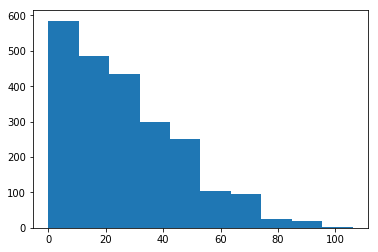

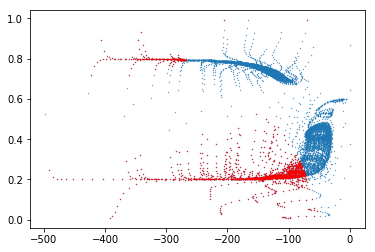

In [16]:
MachineLearning._Y

X = MachineLearning._X
Y = MachineLearning._Y

diff = pred - Y
diff_seq = (diff ** 2).mean(axis=1)

rel_diff_seq = abs(diff/Y).mean(axis=1)

diff_norm = (diff ** 2).sum(axis = 1)
truth_norm = (Y ** 2).sum(axis = 1)

rel_error = diff_norm / truth_norm

sort_index = np.argsort(rel_error)
sort_index = np.flip(sort_index)

sort_index.shape

large_error_index = sort_index[:2300]

np.set_printoptions(threshold=np.nan)
index_sorted = np.sort(large_error_index)

np.sort(index_sorted % 1000)

plt.figure()
plt.hist(index_sorted % 1000)

plt.figure()
plt.scatter(X[:,0],X[:,1],s=0.1)
#plt.plot(X[large_error_index,0],X[large_error_index,1],'r.',markersize=0.5)
#plt.scatter(X[large_error_index,0],X[large_error_index,1],s=0.1,c='r')
th = 2000
plt.scatter(X[sort_index[:th],0],X[sort_index[:th],1],s=0.1,c='r')

In [18]:
rel_error[sort_index[:5000]]

array([10.89888446, 10.73921006, 10.51638625, 10.21753496,  9.92970968,
        9.64972879,  8.49230647,  8.48084418,  7.28396833,  6.75061585,
        6.32479704,  5.53203764,  5.24506969,  5.23762604,  4.93969094,
        4.9247398 ,  4.81715519,  4.18740164,  4.11775258,  3.48693109,
        3.41653169,  3.25440786,  3.25394256,  3.25222338,  3.25193381,
        3.25075059,  3.24984393,  3.24827381,  3.24797162,  3.24704494,
        3.24601968,  3.24555347,  3.24240849,  3.23935819,  3.23732112,
        3.23537782,  3.23482414,  3.23329774,  3.22262078,  3.22196602,
        3.21745825,  3.2112886 ,  3.20164126,  3.20150225,  3.19020174,
        3.19017944,  3.18338299,  3.179516  ,  3.17643232,  3.17587213,
        3.17403691,  3.17256665,  3.17083318,  3.16684674,  3.16625497,
        3.15948032,  3.15038264,  3.14430336,  3.13723157,  3.12176749,
        3.11866074,  3.11010267,  3.08797102,  3.07856116,  3.07471675,
        3.05552694,  3.05111834,  3.04850665,  3.03495503,  3.03

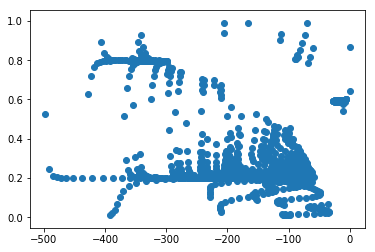

In [45]:
plt.scatter(X[large_error_index,0],X[large_error_index,1])

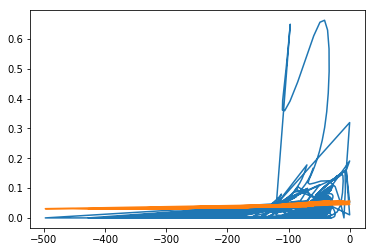

In [16]:
plt.plot(X[:,0],Y[:,4])
plt.plot(X[:,0],pred[:,4])

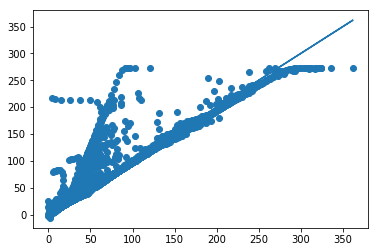

In [17]:
plt.scatter(Y[:,0],pred[:,0])
plt.plot(Y[:,0],Y[:,0])

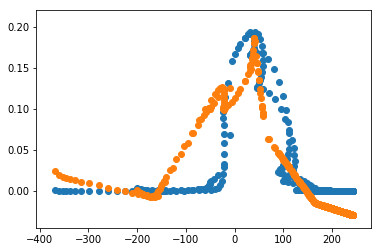

In [152]:
plt.scatter(X[0:2000,0],Y[0:2000,4])
plt.scatter(X[0:2000,0],pred[0:2000,4])

[-600, 300, 1e-07, 100.0]

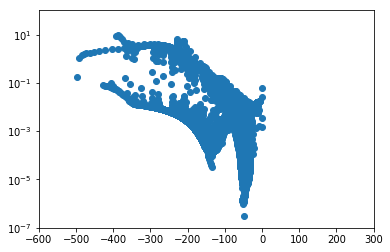

In [19]:
plt.scatter(X[:,0],rel_error)
plt.yscale('log')
plt.axis([-600,300,1e-7,1e2])

[-600, 300, 1e-07, 1.0]

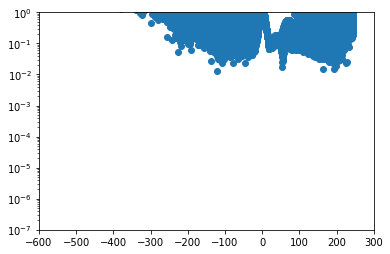

In [96]:
plt.scatter(X[:,0],rel_diff_seq)
plt.yscale('log')
plt.axis([-600,300,1e-7,1e0])

[-600, 300, 0.0001, 100000.0]

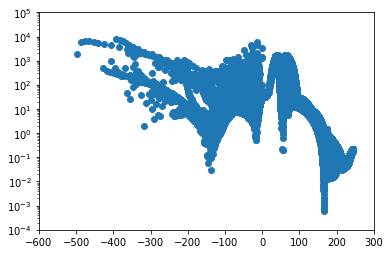

In [95]:
plt.scatter(X[:,0],diff_seq)
plt.yscale('log')
plt.axis([-600,300,1e-4,1e5])

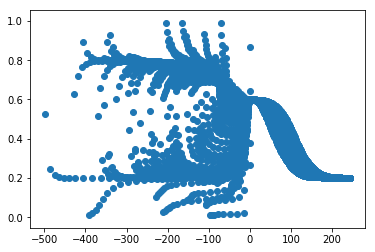

In [37]:
plt.scatter(X[:,0],X[:,1])

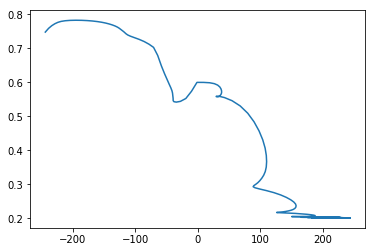

In [38]:
plt.plot(X[1000:2000,0],X[1000:2000,1])